In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1.Reading the Data

In [101]:
data=pd.read_csv('Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [102]:
# In the above data we can see 'Select' in the values which has no valur so we need to convert it to nan
data= data.replace('Select',np.nan)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [104]:
# calculating the percentage of null values 
(data.isnull().sum()/len(data.index)).round(4)

Prospect ID                                      0.0000
Lead Number                                      0.0000
Lead Origin                                      0.0000
Lead Source                                      0.0039
Do Not Email                                     0.0000
Do Not Call                                      0.0000
Converted                                        0.0000
TotalVisits                                      0.0148
Total Time Spent on Website                      0.0000
Page Views Per Visit                             0.0148
Last Activity                                    0.0111
Country                                          0.2663
Specialization                                   0.3658
How did you hear about X Education               0.7846
What is your current occupation                  0.2911
What matters most to you in choosing a course    0.2932
Search                                           0.0000
Magazine                                        

# 2. Cleaning data

2.1 Removing data with highest persent of missing values 

In [105]:
data.drop(columns=['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','How did you hear about X Education','City'],inplace=True)

2.2 Removing Data that is not useful for analysis 

In [106]:
data.drop(columns=['Tags','Prospect ID'],inplace=True)

In [107]:
data=data.set_index('Lead Number')

2.3 Cleaning data which has only few missing values

In [108]:
data['TotalVisits'].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
43.0        1
30.0        1
141.0       1
55.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

In [109]:
data['TotalVisits'].fillna(data['TotalVisits'].median(),inplace= True)

In [110]:
data['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [111]:
data['Lead Source']=data['Lead Source'].fillna('Google')

In [112]:
data['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
         ... 
3.29        1
4.17        1
1.63        1
11.50       1
2.08        1
Name: count, Length: 114, dtype: int64

In [113]:
data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].median(),inplace= True)

In [114]:
data['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: count, dtype: int64

In [115]:
data['Last Activity']=data['Last Activity'].fillna('Email Opened')

In [116]:
data['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [117]:
# since we can see that 'Last Activity' and  'Last Notable Activity' is mostly same , we can drop 'Last Notable Activity'
data.drop(columns=['Last Notable Activity'],inplace=True)

In [118]:
data['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
Italy                      2
Belgium                    2
Ghana                      2
Philippines                2
Netherlands                2
China                      2
Asia/Pacific Region        2
Bangladesh                 2
Uganda                     2
Russia                     1
Sri Lanka                  1
Tanzania                   1
Kenya                      1
Malaysia                   1
Liberia                    1
Denmar

In [119]:
# Since all most all the vists are from the country India we can drop the column country
data.drop(columns=['Country'],inplace=True)

In [120]:
data['Specialization'].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [121]:
data['Specialization']=data['Specialization'].fillna('Finance Management')

In [122]:
data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [123]:
# Since 'Unemployed' has the highest value compared rest of them this column can be dropped 
data.drop(columns=['What is your current occupation'],inplace=True)

In [124]:
data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [125]:
# Since 'Better Career Prospetcs' has the highest value compared rest of them this column can be dropped
data.drop(columns=['What matters most to you in choosing a course'],inplace=True)

In [126]:
data['Lead Source'].value_counts()

Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [127]:
data['Lead Source']=data['Lead Source'].replace('google','Google')

In [128]:
data['Do Not Call'].value_counts()

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

In [129]:
data['Search'].value_counts()

Search
No     9226
Yes      14
Name: count, dtype: int64

In [130]:
data['Newspaper Article'].value_counts()

Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64

In [131]:
data['X Education Forums'].value_counts()

X Education Forums
No     9239
Yes       1
Name: count, dtype: int64

In [132]:
data['Newspaper'].value_counts()

Newspaper
No     9239
Yes       1
Name: count, dtype: int64

In [133]:
data['Digital Advertisement'].value_counts()

Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64

In [134]:
data['Through Recommendations'].value_counts()

Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64

In [135]:
data['Receive More Updates About Our Courses'].value_counts()

Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64

In [136]:
data['Update me on Supply Chain Content'].value_counts()

Update me on Supply Chain Content
No    9240
Name: count, dtype: int64

In [137]:
data['Get updates on DM Content'].value_counts()

Get updates on DM Content
No    9240
Name: count, dtype: int64

In [138]:
data['I agree to pay the amount through cheque'].value_counts()

I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64

In [139]:
#In all the avobe cases from 'Do Not Call' till 'I agree to pay the amount through cheque' we can see most of the values is 'no' so we can drop them
data.drop(columns=['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],inplace=True)

In [140]:
(data.isnull().sum()/len(data.index)).round(4)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [141]:
# As we can see above there are no null values in the data anymore  

# 3. EDA

3.1 Univariate Analysis (Categorical)

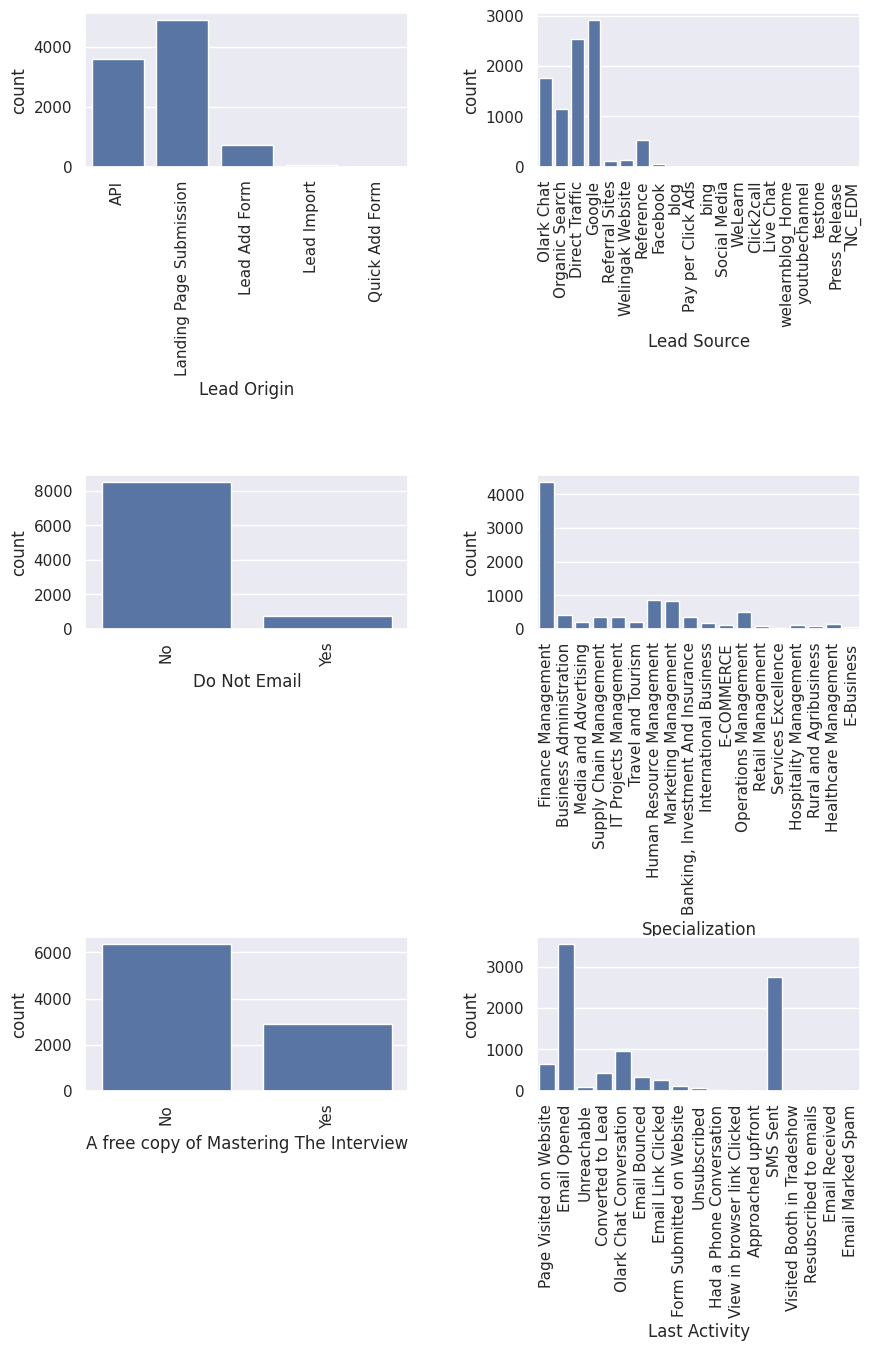

In [142]:
plt.figure(figsize=(10,20))
sns.set()
plt.subplots_adjust(wspace=.4,hspace=2)
plt.subplot(4,2,1)
sns.countplot(x='Lead Origin',data=data)
plt.xticks(rotation=90)

plt.subplot(4,2,2)
sns.countplot(x='Lead Source',data=data)
plt.xticks(rotation=90)

plt.subplot(4,2,3)
sns.countplot(x='Do Not Email',data=data)
plt.xticks(rotation=90)

plt.subplot(4,2,4)
sns.countplot(x='Specialization',data=data)
plt.xticks(rotation=90)

plt.subplot(4,2,5)
sns.countplot(x='A free copy of Mastering The Interview',data=data)
plt.xticks(rotation=90)

plt.subplot(4,2,6)
sns.countplot(x='Last Activity',data=data)
plt.xticks(rotation=90)


plt.show()

Conclusion:

            1. Google and Direct Traffic are the two primary sources of leads.
            2. The majority of people select finance management as their specialty above other specializations.
            3. The quantity of values in the last activity for both SMS sent and emails opened is high.

3.2 Univariate Analysis(Contenious)

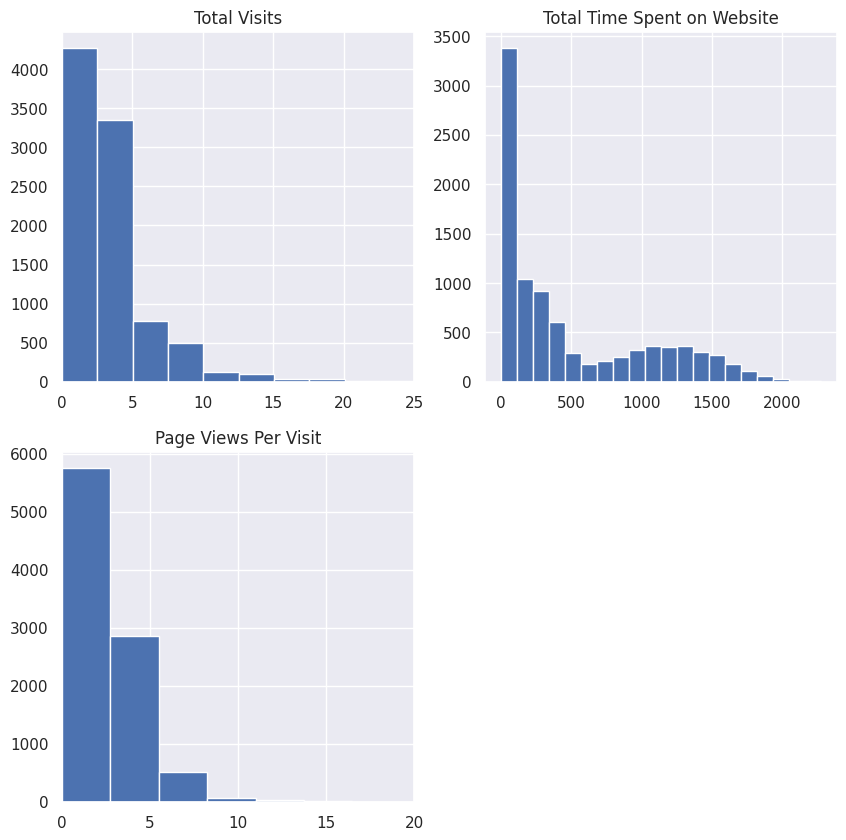

In [143]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(data['TotalVisits'], bins = 100)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(data['Total Time Spent on Website'], bins = 20)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(data['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

3.3 Bivariate Analysis(with respect to 'converted')

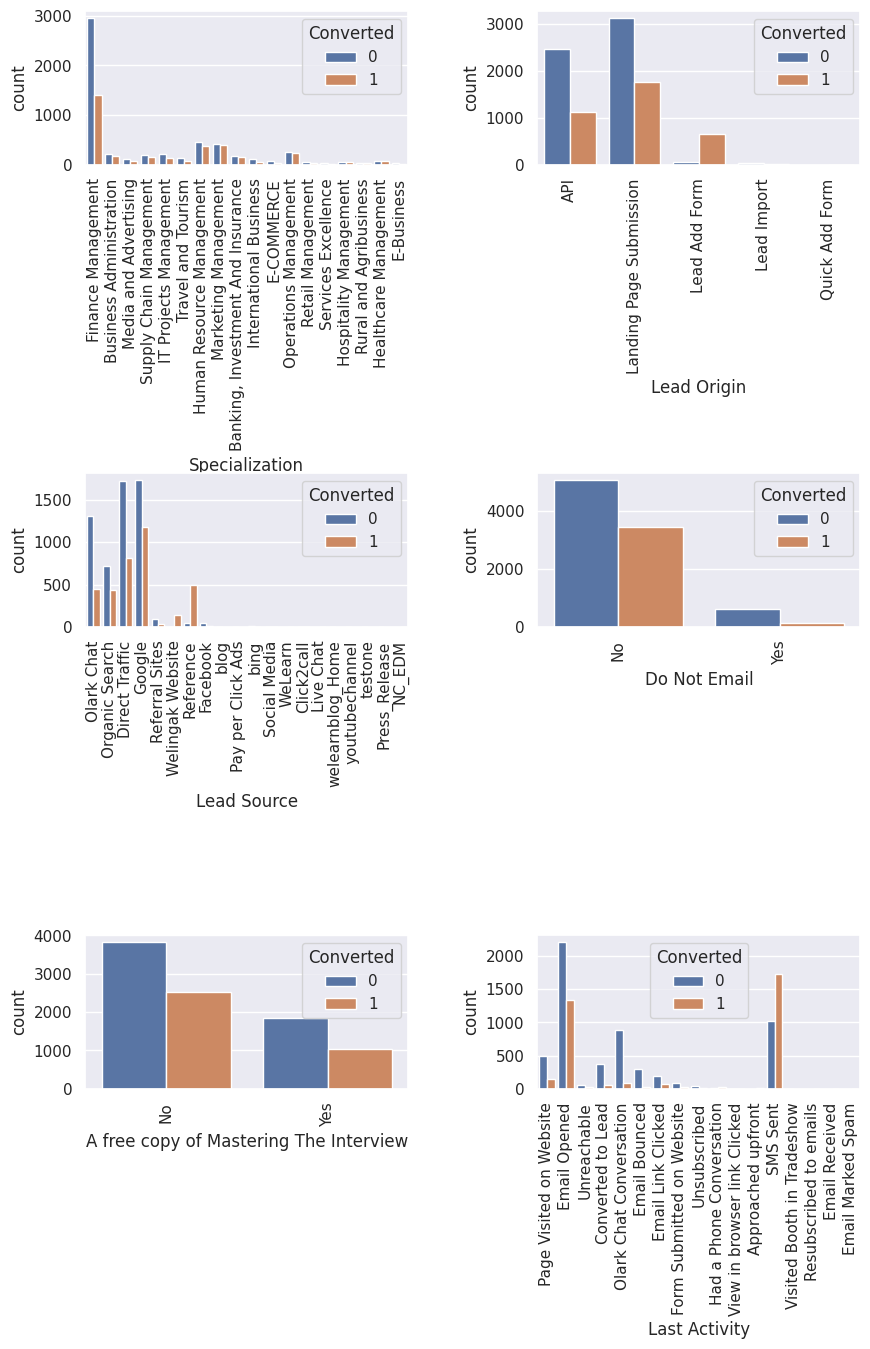

In [144]:
plt.figure(figsize=(10,20))
plt.subplots_adjust(wspace=.4,hspace=2)

plt.subplot(4,2,1)
sns.countplot(x ='Specialization',hue = 'Converted', data = data)
plt.xticks(rotation=90)

plt.subplot(4,2,2)
sns.countplot(x ='Lead Origin',hue = 'Converted', data = data)
plt.xticks(rotation=90)

plt.subplot(4,2,3)
sns.countplot(x ='Lead Source',hue = 'Converted',data = data)
plt.xticks(rotation=90)
              
plt.subplot(4,2,4)
sns.countplot(x ='Do Not Email',hue = 'Converted', data = data)
plt.xticks(rotation=90)

plt.subplot(4,2,5)
sns.countplot(x ='A free copy of Mastering The Interview',hue = 'Converted', data = data)
plt.xticks(rotation=90)

plt.subplot(4,2,6)
sns.countplot(x ='Last Activity',hue = 'Converted', data = data)
plt.xticks(rotation=90)


plt.show()

Conclusions:

               1.Google and Direct Traffic have more hot leads than Other Category.
               2.Those who have opened emails and for whom the SMS is sent comprise a larger pool of hot leads.
               3.More hot leads come from finance management than from any other specialty. 

# 4.Data preparation

In [145]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview
Lead Number,,,,,,,,,,
660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,No
660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Finance Management,No
660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Yes
660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,No
660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Finance Management,No


In [146]:
#Changing to binary variables 
a= ['Do Not Email', 'A free copy of Mastering The Interview']

def binary(x):
    return x.map({'Yes': 1, "No": 0})

data[a] = data[a].apply(binary)

In [147]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview
Lead Number,,,,,,,,,,
660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,0
660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Finance Management,0
660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,1
660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,0
660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,0


4.1 Creating Dummy Variables 

In [148]:
dummy_data = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization']],drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
660728,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
660727,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
660719,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
660681,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [149]:
data = pd.concat([data, dummy_data], axis=1)
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,0,...,False,False,False,False,False,False,False,False,False,False
660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Finance Management,0,...,False,False,False,False,False,False,False,False,False,False
660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,1,...,False,False,False,False,False,False,False,False,False,False
660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,0,...,False,False,False,True,False,False,False,False,False,False
660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,0,...,False,False,False,False,False,False,False,False,False,False


In [150]:
data= data.replace(False,0)
data= data.replace(True,1)

In [151]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,0,...,0,0,0,0,0,0,0,0,0,0
660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Finance Management,0,...,0,0,0,0,0,0,0,0,0,0
660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,1,...,0,0,0,0,0,0,0,0,0,0
660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,0,...,0,0,0,1,0,0,0,0,0,0
660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
# Dropping the colums for which the dummies have been created 
data =data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization'], axis = 1)

In [153]:
data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660728,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660727,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660719,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660681,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


4.2 Splitting the data into  train and test set.

In [154]:
from sklearn.model_selection import train_test_split
X=data.drop(['Converted'], axis=1)
y=data['Converted']

In [155]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=.7,test_size=.3,random_state=100)

4.3 Scaling the features.

In [156]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [157]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Lead Number,,,,,,,,,,,,,,,,,,,,,
641410,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
597687,0,0.100767,0.005716,-0.470569,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
626825,0,0.290067,-0.691418,0.070401,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
587928,0,0.290067,1.365219,1.226321,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
622366,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


4.4 RFE-Based Feature Selection

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Create a LogisticRegression object
logreg = LogisticRegression(solver='liblinear')

# Create an RFE object with 15 features to select
rfe =RFE(logreg,n_features_to_select=20)

# Fit the RFE model
rfe =rfe.fit(X_train, y_train)

# Check the selected features
print("Num Features: %s" % (rfe.n_features_))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))


Num Features: 20
Selected Features: [ True False  True False False  True  True False False False False False
 False False  True False False False  True False False False  True False
 False False False False  True  True  True False False  True  True  True
  True  True  True  True False False False False False False False  True
 False  True False False False False False False False  True False False
 False]
Feature Ranking: [ 1 27  1 28 33  1  1 15 20  9  5 14 23  6  1 12 25 11  1 13  2 19  1 36
  8 42 18 24  1  1  1  7 29  1  1  1  1  1  1  1 35  3 26 32 30 17 22  1
 10  1 31 21  4 38 39 40 16  1 41 37 34]


In [159]:
all_features= np.array(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
all_features

array([['Do Not Email', 'True', '1'],
       ['TotalVisits', 'False', '27'],
       ['Total Time Spent on Website', 'True', '1'],
       ['Page Views Per Visit', 'False', '28'],
       ['A free copy of Mastering The Interview', 'False', '33'],
       ['Lead Origin_Landing Page Submission', 'True', '1'],
       ['Lead Origin_Lead Add Form', 'True', '1'],
       ['Lead Origin_Lead Import', 'False', '15'],
       ['Lead Origin_Quick Add Form', 'False', '20'],
       ['Lead Source_Direct Traffic', 'False', '9'],
       ['Lead Source_Facebook', 'False', '5'],
       ['Lead Source_Google', 'False', '14'],
       ['Lead Source_Live Chat', 'False', '23'],
       ['Lead Source_NC_EDM', 'False', '6'],
       ['Lead Source_Olark Chat', 'True', '1'],
       ['Lead Source_Organic Search', 'False', '12'],
       ['Lead Source_Pay per Click Ads', 'False', '25'],
       ['Lead Source_Press_Release', 'False', '11'],
       ['Lead Source_Reference', 'True', '1'],
       ['Lead Source_Referral Sites', 'F

In [160]:
# Top 15 selected using RFE
selcol=X_train.columns[rfe.support_]
selcol

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Rural and Agribusiness'],
      dtype='object')

In [161]:
# variables thatshould not be used for modeling
rejcol=X_train.columns[~rfe.support_]
rejcol

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization

# 5.Model Building 

5.1 Model 1 

In [162]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[selcol])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2890.9
Date:                Sun, 23 Jun 2024   Deviance:                       5781.8
Time:                        23:55:53   Pearson chi2:                 6.75e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3530
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.5238      0.105     -4.965      0.000      -0.731      -0.317
Do Not Email                               -1.1523      0.184     -6.263      0.000      -1.513      -0.792
Total Time Spent on Website                 1.1016      0.038     28.875      0.000       1.027       1.176
Lead Origin_Landing Page Submission        -0.5315      0.100     -5.334      0.000      -0.727      -0.336
Lead Origin_Lead Add Form                   2.9165      0.485      6.018      0.000       1.967       3.866
Lead Source_Olark Chat                      0.9655      0.115      8.390      0.000       0.740       1.191
Lead Source_Reference                       0.6562      0.514      1.277      0.201      -0.351       1.663
Lead Source_Welingak Website                2.4507      0.869      2.821      0.005       0.748       4.153
Last Activity_Converted to Lead            -1.2206      0.206     -5.926      0.000      -1.624      -0.817
Last Activity_Email Bounced                -0.9938      0.333     -2.981      0.003      -1.647      -0.340
Last Activity_Email Link Clicked           -0.5583      0.209     -2.669      0.008      -0.968      -0.148
Last Activity_Email Received               21.6239   2.01e+04      0.001      0.999   -3.93e+04    3.93e+04
Last Activity_Form Submitted on Website    -0.6336      0.321     -1.976      0.048      -1.262      -0.005
Last Activity_Had a Phone Conversation      2.0412      0.641      3.186      0.001       0.786       3.297
Last Activity_Olark Chat Conversation      -1.5069      0.161     -9.355      0.000      -1.823      -1.191
Last Activity_Page Visited on Website      -0.5563      0.140     -3.960      0.000      -0.832      -0.281
Last Activity_Resubscribed to emails       22.6581   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Last Activity_SMS Sent                      1.1076      0.074     14.896      0.000       0.962       1.253
Specialization_Finance Management          -0.5584      0.086     -6.471      0.000      -0.728      -0.389
Specialization_Hospitality Management      -0.8690      0.304     -2.861      0.004      -1.464      -0.274
Specialization_Rural and Agribusiness       0.5929      0.374      1.586      0.113      -0.140       1.326
===========================================================================================================
"""

In [163]:
# Dropping the column 'Last Activity_Email Received' and 'Last Activity_Resubscribed to emails' since they has a very high p value 
selcol = selcol.drop(['Last Activity_Email Received','Last Activity_Resubscribed to emails'])

5.2 Model 2

In [164]:
X_train_sm = sm.add_constant(X_train[selcol])
logmo2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmo2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2893.7
Date:                Sun, 23 Jun 2024   Deviance:                       5787.4
Time:                        23:55:53   Pearson chi2:                 6.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3525
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.5215      0.105     -4.944      0.000      -0.728      -0.315
Do Not Email                               -1.1530      0.184     -6.268      0.000      -1.514      -0.792
Total Time Spent on Website                 1.1020      0.038     28.887      0.000       1.027       1.177
Lead Origin_Landing Page Submission        -0.5297      0.100     -5.317      0.000      -0.725      -0.334
Lead Origin_Lead Add Form                   2.9176      0.485      6.021      0.000       1.968       3.867
Lead Source_Olark Chat                      0.9705      0.115      8.437      0.000       0.745       1.196
Lead Source_Reference                       0.6554      0.514      1.276      0.202      -0.351       1.662
Lead Source_Welingak Website                2.4505      0.869      2.821      0.005       0.748       4.153
Last Activity_Converted to Lead            -1.2241      0.206     -5.943      0.000      -1.628      -0.820
Last Activity_Email Bounced                -0.9973      0.333     -2.992      0.003      -1.651      -0.344
Last Activity_Email Link Clicked           -0.5628      0.209     -2.691      0.007      -0.973      -0.153
Last Activity_Form Submitted on Website    -0.6379      0.321     -1.989      0.047      -1.266      -0.009
Last Activity_Had a Phone Conversation      2.0377      0.641      3.181      0.001       0.782       3.293
Last Activity_Olark Chat Conversation      -1.5122      0.161     -9.390      0.000      -1.828      -1.197
Last Activity_Page Visited on Website      -0.5602      0.140     -3.988      0.000      -0.835      -0.285
Last Activity_SMS Sent                      1.1035      0.074     14.851      0.000       0.958       1.249
Specialization_Finance Management          -0.5587      0.086     -6.476      0.000      -0.728      -0.390
Specialization_Hospitality Management      -0.8708      0.304     -2.867      0.004      -1.466      -0.276
Specialization_Rural and Agribusiness       0.5905      0.374      1.579      0.114      -0.142       1.323
===========================================================================================================
"""

In [165]:
# Dropping the column 'Lead Source_Reference'  since it has a very high p value 
selcol = selcol.drop('Lead Source_Reference')

5.3 Model 3

In [166]:
X_train_sm = sm.add_constant(X_train[selcol])
logmo3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmo3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2894.5
Date:                Sun, 23 Jun 2024   Deviance:                       5788.9
Time:                        23:55:54   Pearson chi2:                 6.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3523
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.5162      0.105     -4.899      0.000      -0.723      -0.310
Do Not Email                               -1.1712      0.184     -6.359      0.000      -1.532      -0.810
Total Time Spent on Website                 1.1017      0.038     28.879      0.000       1.027       1.176
Lead Origin_Landing Page Submission        -0.5325      0.100     -5.347      0.000      -0.728      -0.337
Lead Origin_Lead Add Form                   3.4955      0.195     17.939      0.000       3.114       3.877
Lead Source_Olark Chat                      0.9697      0.115      8.428      0.000       0.744       1.195
Lead Source_Welingak Website                1.8776      0.749      2.505      0.012       0.409       3.346
Last Activity_Converted to Lead            -1.2254      0.206     -5.950      0.000      -1.629      -0.822
Last Activity_Email Bounced                -1.0138      0.336     -3.022      0.003      -1.671      -0.356
Last Activity_Email Link Clicked           -0.5573      0.208     -2.673      0.008      -0.966      -0.149
Last Activity_Form Submitted on Website    -0.6378      0.320     -1.990      0.047      -1.266      -0.010
Last Activity_Had a Phone Conversation      2.0380      0.641      3.181      0.001       0.782       3.294
Last Activity_Olark Chat Conversation      -1.5113      0.161     -9.388      0.000      -1.827      -1.196
Last Activity_Page Visited on Website      -0.5595      0.140     -3.984      0.000      -0.835      -0.284
Last Activity_SMS Sent                      1.1023      0.074     14.838      0.000       0.957       1.248
Specialization_Finance Management          -0.5640      0.086     -6.547      0.000      -0.733      -0.395
Specialization_Hospitality Management      -0.8628      0.303     -2.849      0.004      -1.456      -0.269
Specialization_Rural and Agribusiness       0.5907      0.374      1.580      0.114      -0.142       1.324
===========================================================================================================
"""

In [167]:
# Dropping the column 'Specialization_Rural and Agribusiness'  since it has a very high p value 
selcol= selcol.drop('Specialization_Rural and Agribusiness')

5.4 Model 4

In [168]:
X_train_sm = sm.add_constant(X_train[selcol])
logmo4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmo4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2895.7
Date:                Sun, 23 Jun 2024   Deviance:                       5791.4
Time:                        23:55:54   Pearson chi2:                 6.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3521
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.5074      0.105     -4.825      0.000      -0.713      -0.301
Do Not Email                               -1.1683      0.184     -6.338      0.000      -1.530      -0.807
Total Time Spent on Website                 1.1011      0.038     28.874      0.000       1.026       1.176
Lead Origin_Landing Page Submission        -0.5327      0.100     -5.350      0.000      -0.728      -0.338
Lead Origin_Lead Add Form                   3.4938      0.195     17.934      0.000       3.112       3.876
Lead Source_Olark Chat                      0.9712      0.115      8.443      0.000       0.746       1.197
Lead Source_Welingak Website                1.8790      0.749      2.507      0.012       0.410       3.348
Last Activity_Converted to Lead            -1.2223      0.206     -5.936      0.000      -1.626      -0.819
Last Activity_Email Bounced                -1.0168      0.336     -3.029      0.002      -1.675      -0.359
Last Activity_Email Link Clicked           -0.5618      0.208     -2.695      0.007      -0.970      -0.153
Last Activity_Form Submitted on Website    -0.6450      0.320     -2.013      0.044      -1.273      -0.017
Last Activity_Had a Phone Conversation      2.0301      0.640      3.170      0.002       0.775       3.285
Last Activity_Olark Chat Conversation      -1.5139      0.161     -9.405      0.000      -1.829      -1.198
Last Activity_Page Visited on Website      -0.5546      0.140     -3.955      0.000      -0.829      -0.280
Last Activity_SMS Sent                      1.1005      0.074     14.821      0.000       0.955       1.246
Specialization_Finance Management          -0.5727      0.086     -6.663      0.000      -0.741      -0.404
Specialization_Hospitality Management      -0.8705      0.303     -2.875      0.004      -1.464      -0.277
===========================================================================================================
"""

In [169]:
#Since in the avobe case we can see the value of p is less that 0.05 we need to calculate VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vifcalc(df):
    vif = pd.DataFrame()

    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [170]:
vifcalc(X_train[selcol])

,Features,VIF
4,Lead Source_Olark Chat,1.94
14,Specialization_Finance Management,1.94
0,Do Not Email,1.89
7,Last Activity_Email Bounced,1.84
2,Lead Origin_Landing Page Submission,1.70
13,Last Activity_SMS Sent,1.65
11,Last Activity_Olark Chat Conversation,1.48
3,Lead Origin_Lead Add Form,1.38
1,Total Time Spent on Website,1.23
5,Lead Source_Welingak Website,1.23


Since VIF is less than 5 and P-value is less that 0.05 this can be the final model  

# 6 Model Evaluation

In [171]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.374948,641410
1,0,0.167086,597687
2,0,0.295223,626825
3,0,0.826880,587928
4,0,0.252805,622366


In [172]:
y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.5 else 0)

In [173]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred
0,0,0.374948,641410,0
1,0,0.167086,597687,0
2,0,0.295223,626825,0
3,0,0.826880,587928,1
4,0,0.252805,622366,0


In [174]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Converted_pred'])
confusion

array([[3496,  506],
       [ 778, 1688]])

In [175]:
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Converted_pred'])

0.8014842300556586

Accuracy is at 81%

In [176]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1] 
FN = confusion[1,0]

In [177]:
print('Sensitivity:',TP/(TP+FN))
print('Specificity:',TN/(TN+FP))

Sensitivity: 0.6845093268450932
Specificity: 0.8735632183908046


6.1 ROC curve

In [178]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual,probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return None

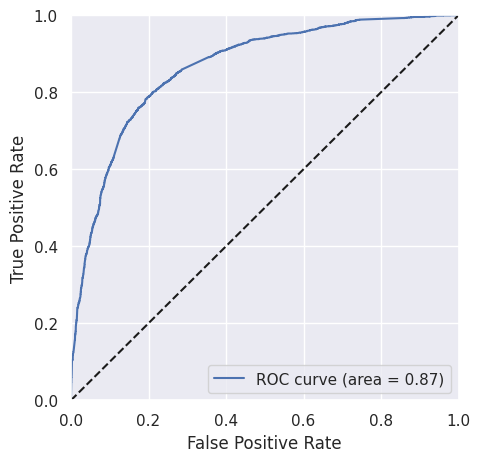

In [179]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

In [180]:
for i in range(10):
    y_train_pred_final[i/10]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i/10 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.374948,641410,0,1,1,1,1,0,0,0,0,0,0
1,0,0.167086,597687,0,1,1,0,0,0,0,0,0,0,0
2,0,0.295223,626825,0,1,1,1,0,0,0,0,0,0,0
3,0,0.826880,587928,1,1,1,1,1,1,1,1,1,1,0
4,0,0.252805,622366,0,1,1,1,0,0,0,0,0,0,0


In [182]:
cutoff_df = pd.DataFrame(columns = ['probability','accuracy','sensitivity','specificity'])
for i in range(10):
    cm = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i/10])
    accuracy = (cm[0,0]+cm[1,1])/(sum(sum(cm)))
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

,probability,accuracy,sensitivity,specificity
0,0.0,0.381262,1.000000,0.000000
1,1.0,0.572975,0.972019,0.327086
2,2.0,0.712121,0.915653,0.586707
3,3.0,0.779375,0.828873,0.748876
4,4.0,0.799938,0.754663,0.827836
5,5.0,0.801484,0.684509,0.873563
6,6.0,0.780921,0.564882,0.914043
7,7.0,0.757730,0.462287,0.939780
8,8.0,0.731138,0.351582,0.965017
9,9.0,0.680581,0.182076,0.987756


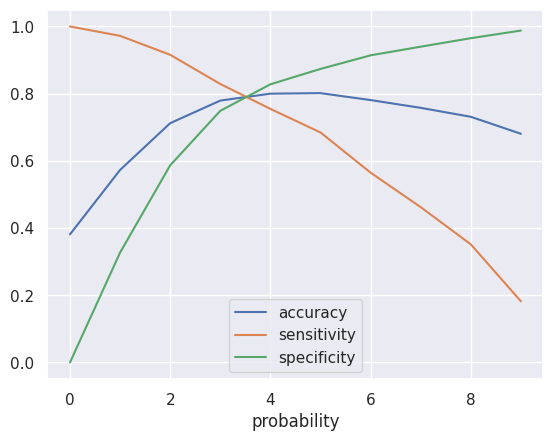

In [184]:
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

The probability threshold is optimal at 3.8

In [185]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.374948,641410,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.167086,597687,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.295223,626825,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.826880,587928,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.252805,622366,0,1,1,1,0,0,0,0,0,0,0,0


In [190]:
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

0.7968460111317254

Accuracy is at 80%

In [188]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
confusion

array([[3261,  741],
       [ 573, 1893]])

In [191]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1] 
FN = confusion[1,0]

In [192]:
print('Sensitivity:',TP/(TP+FN))
print('Specificity:',TN/(TN+FP))

Sensitivity: 0.767639902676399
Specificity: 0.8148425787106447


In [210]:
X_train_sm

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Hospitality Management
Lead Number,,,,,,,,,,,,,,,,,
641410,1.0,0,-0.885371,0,0,1,0,0,0,0,0,0,0,0,0,0,0
597687,1.0,0,0.005716,1,0,0,0,0,0,0,0,0,0,0,0,1,0
626825,1.0,0,-0.691418,0,0,1,0,0,0,0,0,0,0,0,0,1,0
587928,1.0,0,1.365219,1,0,0,0,0,0,0,0,0,0,0,1,0,0
622366,1.0,0,-0.885371,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656685,1.0,0,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,0,0
659710,1.0,0,0.404601,0,1,0,0,0,0,0,0,0,0,0,0,0,1
588165,1.0,0,-0.885371,0,0,1,0,0,0,0,0,0,0,0,0,1,0


# 7. Test set prediction

In [207]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(np.array(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']]))

In [221]:
X_test_sm = sm.add_constant(X_test[selcol])
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

Lead Number
619003    1.000000
636884    0.854007
590281    0.999991
579892    0.033226
617929    0.775305
579992    1.000000
643289    1.000000
581637    1.000000
588474    1.000000
609001    1.000000
dtype: float64

In [222]:
y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,1.000000
1,1,0.854007
2,1,0.999991
3,0,0.033226
4,1,0.775305


In [226]:
y_pred_final['final_test_predicted'] = y_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.38 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_test_predicted
0,1,1.000000,1
1,1,0.854007,1
2,1,0.999991,1
3,0,0.033226,0
4,1,0.775305,1


In [228]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['final_test_predicted'])

0.4953102453102453

In [229]:
confusion = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_test_predicted'])
confusion

array([[ 390, 1287],
       [ 112,  983]])

In [230]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1] 
FN = confusion[1,0]

In [231]:
print('Sensitivity:',TP/(TP+FN))
print('Specificity:',TN/(TN+FP))

Sensitivity: 0.897716894977169
Specificity: 0.23255813953488372


It is evident that our model is providing a sensitivity of roughly.90.
This indicates that our model can predict  converted as converted 90% of the time.

Conclusion:
   
                The factors that matter most to prospective purchasers are:
                1.The total time spend on the Website.
                2.Total number of visits.
                3.When Olark Chat, Google, Direct Traffic, and Organic Search were the major sources
                4.When the last activity was: a. SMS b. Olark chat conversation
                5.When the lead origin is Lead add format.